In [1]:
import qiskit

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from qiskit import BasicAer, IBMQ
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.compiler import transpile
from qiskit.tools.visualization import plot_histogram

### Initialization

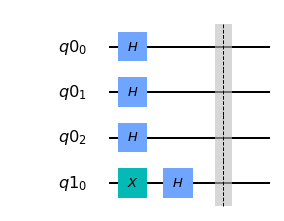

In [3]:
def init(circuit, f_in, f_out, n): #initialize the input states
    for j in range(n):
        circuit.h(f_in[j])
    circuit.x(f_out)
    circuit.h(f_out)
    circuit.barrier()

clause_list = [[1,2,-3],[-1,-2,-3],[-1,2,3]]    
    
f_in = QuantumRegister(3)
f_out = QuantumRegister(1)

auxx = QuantumRegister(1)
qc_aux = QuantumCircuit(auxx)

qc = QuantumCircuit(f_in, f_out)
init(qc, f_in, f_out, 3)



qc.draw(output = 'mpl')

### Triple-controlled NOT gate

In [4]:
def tri_cx(f_in, aux, k):
    tri_aux = QuantumRegister(1)
    qc1 = QuantumCircuit(f_in, tri_aux, aux)
    qc1.ccx(f_in[0], f_in[1], aux[k])
    qc1.ccx(f_in[2], tri_aux, aux[k])
    qc1.ccx(f_in[0], f_in[1], aux[k])
    qc1.barrier()
    return(qc1)  
    # circuit = circuit + qc1


### Bit-flipping clause

In [5]:
def flip_clause(f_in, clause, flip_aux, k):
    qc = QuantumCircuit(f_in, flip_aux)
    tri = tri_cx(f_in, flip_aux, k)
    for (j,literal) in enumerate(clause):
        if (literal < 0):
            qc.x(f_in[j])
    qc.cx(f_in,flip_aux[k])
    qc.barrier()
    qc = qc + tri
    for (j,literal) in enumerate(clause):
        if (literal < 0):
            qc.x(f_in[j])
    qc.barrier()
    return(qc)


### Black-box function $U_f$

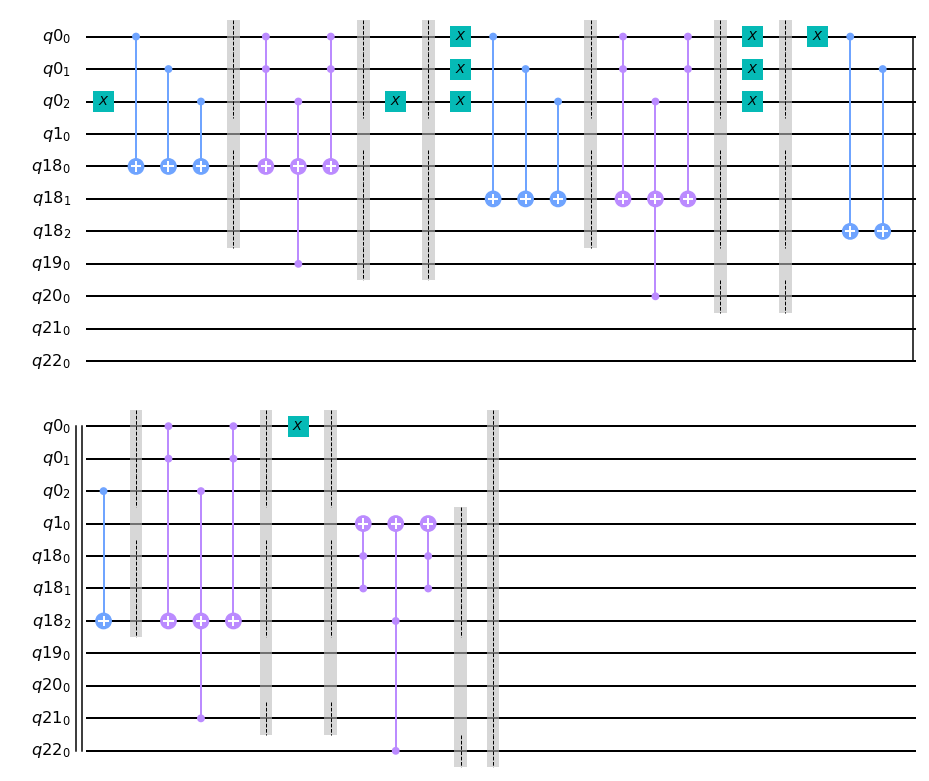

In [9]:
def uf(f_in, f_out, clause_list):
    aux = QuantumRegister(len(clause_list))
    quf = QuantumCircuit(f_in, f_out, aux)
    for(k, clause) in enumerate(clause_list):
        quf = quf + flip_clause(f_in, clause, aux, k)  #for(k, clause) in enumerate(clause_list):
    quf = quf + tri_cx(aux, f_out, 0)
    quf.barrier()
    return(quf)

quff = uf(f_in, f_out, clause_list)

quff.draw(output = 'mpl', scale = 0.5)

### Inversion about the average

In [ ]:
def inversion(f_in, f_out)
    q_in = QuantumRegister(f_in)
    q_out = QuantumRegister(f_out)
    qc = QuantumCircuit(q_in, q_out)
    

### $C^{n-1}Z$ gate

In [47]:
def cnz()

QuantumRegister(3, 'q31')

AttributeError: 'QuantumRegister' object has no attribute 'index'

Help on class QuantumRegister in module qiskit.circuit.quantumregister:

class QuantumRegister(qiskit.circuit.register.Register)
 |  Implement a quantum register.
 |  
 |  Method resolution order:
 |      QuantumRegister
 |      qiskit.circuit.register.Register
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  qasm(self)
 |      Return OPENQASM string for this register.
 |  
 |  ----------------------------------------------------------------------
 |  Data and other attributes defined here:
 |  
 |  __slotnames__ = []
 |  
 |  bit_type = <class 'qiskit.circuit.quantumregister.Qubit'>
 |      Implement a quantum bit.
 |  
 |  instances_counter = count(21)
 |  
 |  prefix = 'q'
 |  
 |  ----------------------------------------------------------------------
 |  Methods inherited from qiskit.circuit.register.Register:
 |  
 |  __eq__(self, other)
 |      Two Registers are the same if they are of the same type
 |      (i.e. quantum/classical), and have the same name and size.

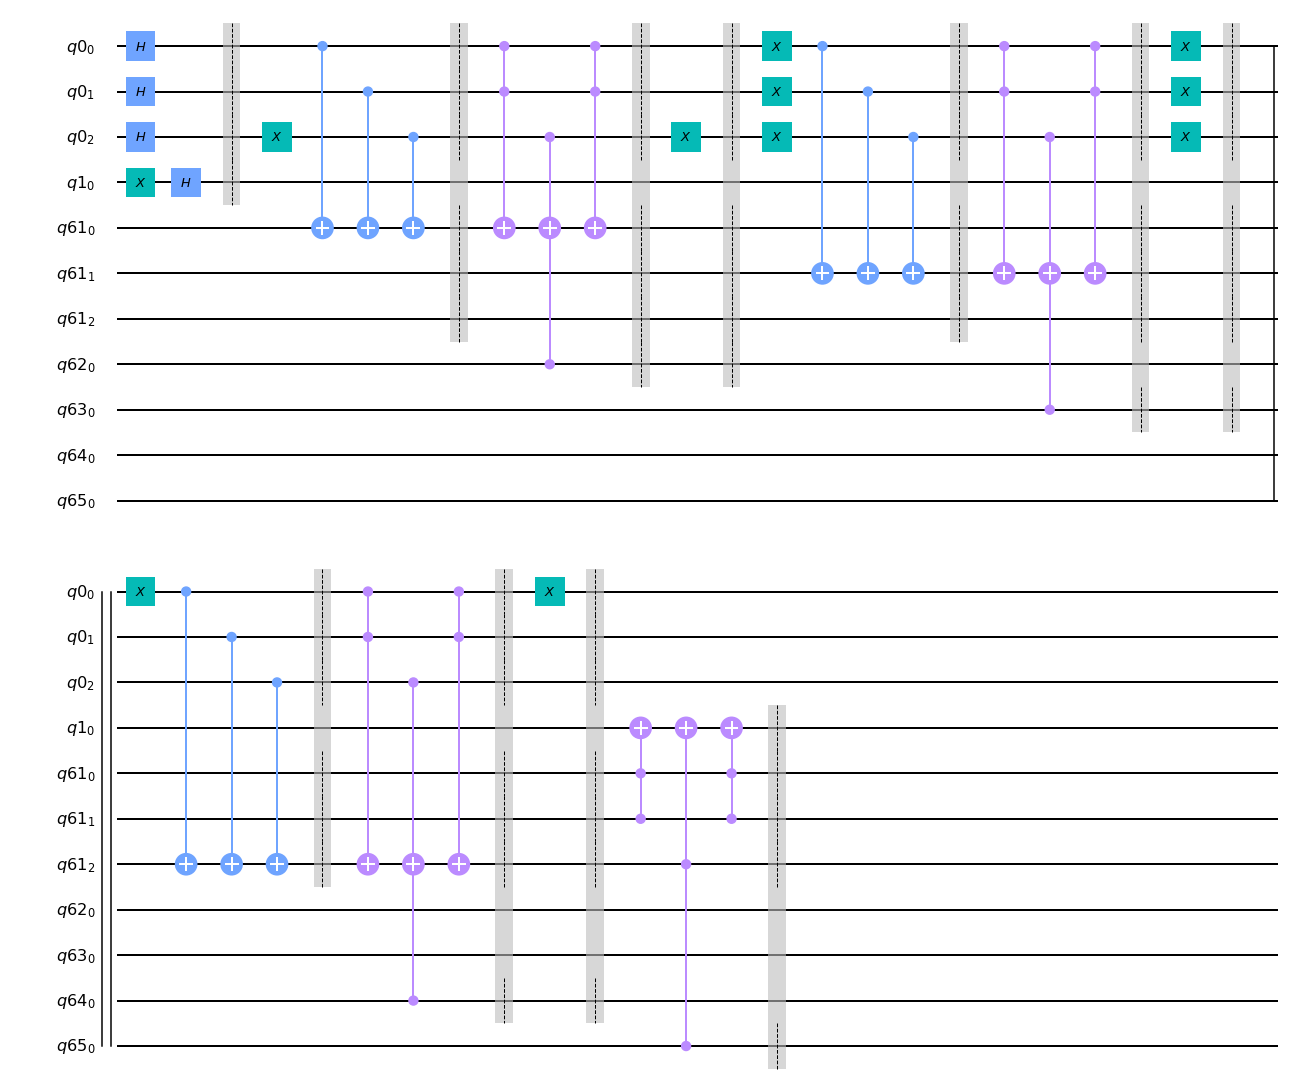

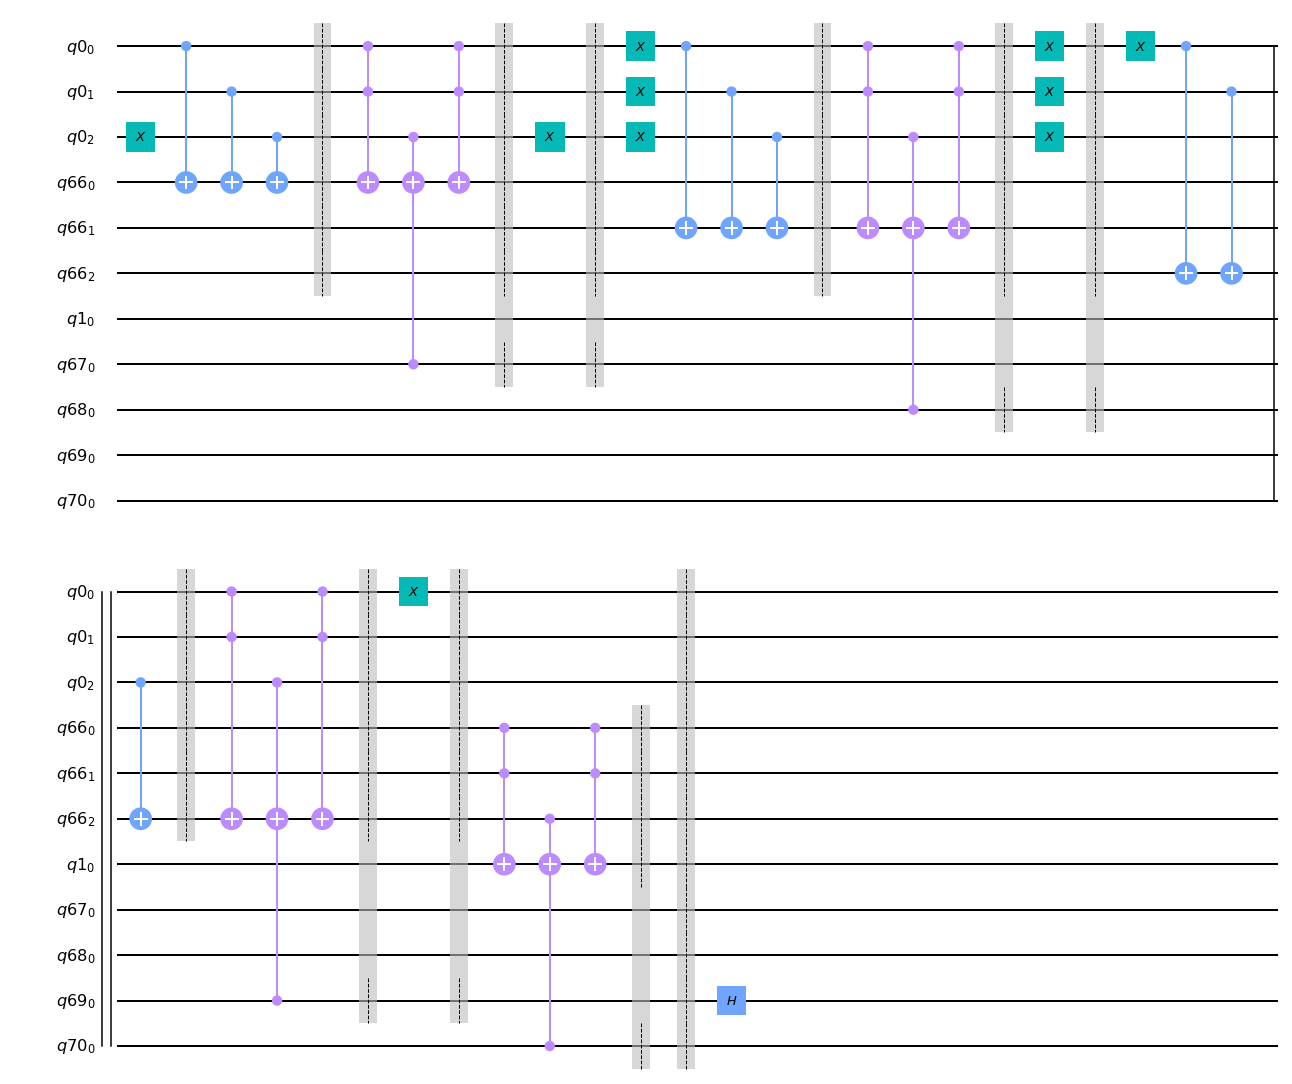